source:https://realpython.com/linear-regression-in-python/

In this post, I will explain how to implement linear regression using Python.  I am going to use a Python library called Scikit Learn to execute Linear Regression. Scikit-learn is a powerful Python module for machine learning and it comes with default data sets. I will use one such default data set called Boston Housing, the data set contains information about the housing values in suburbs of Boston.
Introduction
In my
step by step guide to Python for data science
article, I have explained how to install Python and the most commonly used libraries for data science. Go through this post to understand the commonly used Python libraries.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import sklearn
#import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt

Linear Regression using two dimensional data 
First, let’s understand Linear Regression using just one dependent and independent variable. I create two lists  xs and ys.

In [2]:
xs=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys=[10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
len(xs),len(ys)

(24, 24)

I plot these lists using a scatter plot. I assume xs as the independent variable and ys as the dependent variable.

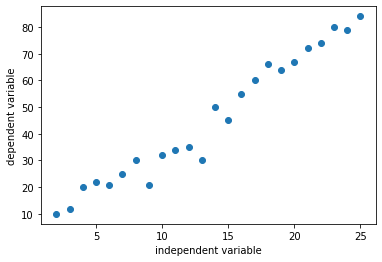

In [3]:
plt.scatter(xs,ys)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

You can see that the dependent variable has a linear distribution with respect to the independent variable. A linear regression line has the equation Y = mx+c, where m is the coefficient of independent variable and c is the intercept. The mathematical formula to calculate slope (m) is: (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2)) The formula to calculate intercept (c) is: mean(y) – mean(x) * m Now, let’s write a function for intercept and slope (coefficient):

In [4]:
def slope_intercept(x_val,y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m=round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    
    return m,b

To see the slope and intercept for xs and ys, we just need to call the function slope_intercept:

In [5]:
slope_intercept(xs,ys)

(3.29, 0.92)

In [6]:
m,b=slope_intercept(xs,ys)

In [7]:
reg_line=[(m*x)+b for x in xs]

reg_line is the equation of the regression line:

Now, let’s plot a regression line on xs and ys:

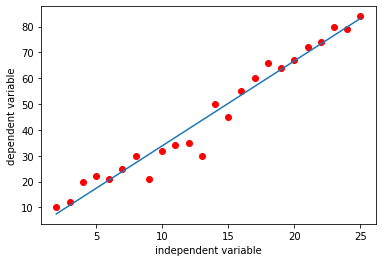

In [8]:
plt.scatter(xs,ys,color="red")
plt.plot(xs,reg_line)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

# Root Mean Squared Error(RMSE)

RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, and RMSE is a measure of how spread out these residuals are. If Yi is the actual data point and Y^i is the predicted value by the equation of line then RMSE is the square root of (Yi – Y^i)**2 Let’s define a function for RMSE:

In [9]:
def rmse(y1,y_hat):
    y_actual=np.array(y1)
    y_pred=np.array(y_hat)
    error=(y_actual-y_pred)**2
    error_mean=round(np.mean(error),4)
    err_sq=sqrt(error_mean)
    return err_sq

In [10]:
rmse(ys,reg_line)

4.53959249272443

Now, let’s run Linear Regression on Boston housing data set to predict the housing prices using different variables.

I create a Pandas data frame for independent and dependent variables. The boston.target is the housing prices.

# Simple Linear Regression With scikit-learn
Let’s start with the simplest case, which is simple linear regression.

There are five basic steps when you’re implementing linear regression:

1.Import the packages and classes you need.

2.Provide data to work with and eventually do appropriate transformations.

3.Create a regression model and fit it with existing data.

4.Check the results of model fitting to know whether the model is satisfactory.

5.Apply the model for predictions.



These steps are more or less general for most of the regression approaches and implementations.

# Step 1: Import packages and classes
The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

The fundamental data type of NumPy is the array type called numpy.ndarray. The rest of this article uses the term array to refer to instances of the type numpy.ndarray.

The class sklearn.linear_model.LinearRegression will be used to perform linear and polynomial regression and make predictions accordingly.

# Step 2: Provide data
The second step is defining data to work with. The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. This is the simplest way of providing data for regression:

In [15]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.


This is how x and y look now:

In [16]:
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [17]:
print(y)

[ 5 20 14 32 22 38]


As you can see, x has two dimensions, and x.shape is (6, 1), while y has a single dimension, and y.shape is (6,).

# Step 3: Create a model and fit it
The next step is to create a linear regression model and fit it using the existing data.

Let’s create an instance of the class LinearRegression, which will represent the regression model:



In [18]:
model=LinearRegression()

This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:


>fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).

>normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).

>copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).

>n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

This example uses the default values of all parameters.

It’s time to start using the model. First, you need to call .fit() on model:

In [20]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. That’s why you can replace the last two statements with this one:

In [21]:
model = LinearRegression().fit(x, y)

This statement does the same thing as the previous two. It’s just shorter.

# Step 4: Get results


Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.


You can obtain the coefficient of determination (𝑅²) with .score() called on model:

In [22]:
r_sq=model.score(x,y)
print('cofficient of determination: ', r_sq)

cofficient of determination:  0.715875613747954


When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².



The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:


In [24]:
print("Slope value (b1) : ",model.coef_)

Slope value (b1) :  [0.54]


In [26]:
print("intercept(b0) : ",model.intercept_)

intercept(b0) :  5.633333333333329


The code above illustrates how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value 𝑏₀ = 5.63 (approximately) illustrates that your model predicts the response 5.63 when 𝑥 is zero. The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

You should notice that you can provide y as a two-dimensional array as well. In this case, you’ll get a similar result. This is how it might look:

In [27]:
new_model=LinearRegression().fit(x,y.reshape((-1,1)))
print("intercept(b0) : ",new_model.intercept_)

intercept(b0) :  [5.63333333]


In [28]:
print("Slope value (b1) : ",new_model.coef_)

Slope value (b1) :  [[0.54]]


As you can see, this example is very similar to the previous one, but in this case, .intercept_ is a one-dimensional array with the single element 𝑏₀, and .coef_ is a two-dimensional array with the single element 𝑏₁.

# Step 5: Predict response

Once there is a satisfactory model, you can use it for predictions with either existing or new data.

To obtain the predicted response, use .predict():

In [29]:
y_pred=model.predict(x)
print('predicted response',y_pred,sep='\n')

predicted response
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


When applying .predict(), you pass the regressor as the argument and get the corresponding predicted response.

This is a nearly identical way to predict the response:

In [30]:
y_pred=model.intercept_+model.coef_*x
print('Predicted response',y_pred,sep='\n')

Predicted response
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In this case, you multiply each element of x with model.coef_ and add model.intercept_ to the product.


The output here differs from the previous example only in dimensions. The predicted response is now a two-dimensional array, while in the previous case, it had one dimension.

If you reduce the number of dimensions of x to one, these two approaches will yield the same result. You can do this by replacing x with x.reshape(-1), x.flatten(), or x.ravel() when multiplying it with model.coef_.

In practice, regression models are often applied for forecasts. This means that you can use fitted models to calculate the outputs based on some other, new inputs:

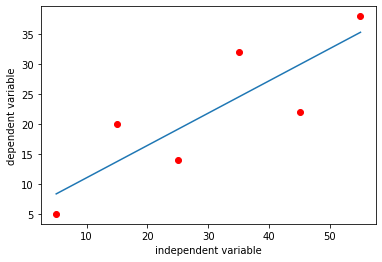

In [33]:
regression_line=[ model.intercept_+model.coef_*p for p in x]
plt.scatter(x,y,color="red")
plt.plot(x,regression_line)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

In [34]:
x_new=np.arange(5).reshape((-1,1))
print(x_new)
y_new=model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


Here .predict() is applied to the new regressor x_new and yields the response y_new. This example conveniently uses arange() from numpy to generate an array with the elements from 0 (inclusive) to 5 (exclusive), that is 0, 1, 2, 3, and 4.

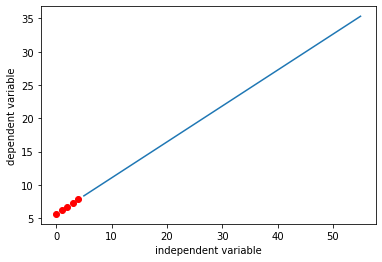

In [35]:
plt.scatter(x_new,y_new,color="red")
plt.plot(x,regression_line)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

# Multiple Linear Regression With scikit-learn
You can implement multiple linear regression following the same steps as you would for simple regression.

Steps 1 and 2: Import packages and classes, and provide data

First, you import numpy and sklearn.linear_model.LinearRegression and provide known inputs and output:

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [41]:
x=[[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y=[4,5,20,14,32,22,38,43]
x,y=np.array(x),np.array(y)

That’s a simple way to define the input x and output y. You can print x and y to see how they look now:

In [42]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In multiple linear regression, x is a two-dimensional array with at least two columns, while y is usually a one-dimensional array. This is a simple example of multiple linear regression, and x has exactly two columns.

# Step 3: Create a model and fit it

The next step is to create the regression model as an instance of LinearRegression and fit it with .fit():

In [43]:
model=LinearRegression().fit(x,y)

The result of this statement is the variable model referring to the object of type LinearRegression. It represents the regression model fitted with existing data.

# Step 4: Get results

You can obtain the properties of the model the same way as in the case of simple linear regression:


In [44]:
r_sq=model.score(x,y)
print("coefficient of determination:",r_sq)
print("intercept : ",model.intercept_)
print("slope : ",model.coef_)

coefficient of determination: 0.8615939258756776
intercept :  5.52257927519819
slope :  [0.44706965 0.25502548]


You obtain the value of 𝑅² using .score() and the values of the estimators of regression coefficients with .intercept_ and .coef_. Again, .intercept_ holds the bias 𝑏₀, while now .coef_ is an array containing 𝑏₁ and 𝑏₂ respectively.

In this example, the intercept is approximately 5.52, and this is the value of the predicted response when 𝑥₁ = 𝑥₂ = 0. The increase of 𝑥₁ by 1 yields the rise of the predicted response by 0.45. Similarly, when 𝑥₂ grows by 1, the response rises by 0.26.

# Step 5: Predict response

Predictions also work the same way as in the case of simple linear regression:

In [45]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


The predicted response is obtained with .predict(), which is very similar to the following:

In [46]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


You can predict the output values by multiplying each column of the input with the appropriate weight, summing the results and adding the intercept to the sum.


You can apply this model to new data as well:

In [48]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [50]:
y_new = model.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


That’s the prediction using a linear regression model.

# Polynomial Regression With scikit-learn
Implementing polynomial regression with scikit-learn is very similar to linear regression. There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥².

# Step 1: Import packages and classes

In addition to numpy and sklearn.linear_model.LinearRegression, you should also import the class PolynomialFeatures from sklearn.preprocessing:

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

The import is now done, and you have everything you need to work with.

# Step 2a: Provide data

This step defines the input and output and is the same as in the case of linear regression:

In [52]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

Now you have the input and output in a suitable format. Keep in mind that you need the input to be a two-dimensional array. That’s why .reshape() is used.

# Step 2b: Transform input data


This is the new step you need to implement for polynomial regression!


As you’ve seen earlier, you need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. For that reason, you should transform the input array x to contain the additional column(s) with the values of 𝑥² (and eventually more features).


It’s possible to transform the input array in several ways (like using insert() from numpy), but the class PolynomialFeatures is very convenient for this purpose. Let’s create an instance of this class:


In [53]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

The variable transformer refers to an instance of PolynomialFeatures which you can use to transform the input x.

You can provide several optional parameters to PolynomialFeatures:

>degree is an integer (2 by default) that represents the degree of the polynomial regression function.


>interaction_only is a Boolean (False by default) that decides whether to include only interaction features (True) or all features (False).


>include_bias is a Boolean (True by default) that decides whether to include the bias (intercept) column of ones (True) or not (False).


This example uses the default values of all parameters, but you’ll sometimes want to experiment with the degree of the function, and it can be beneficial to provide this argument anyway.

Before applying transformer, you need to fit it with .fit():

In [54]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

Once transformer is fitted, it’s ready to create a new, modified input. You apply .transform() to do that:



In [55]:
x_ = transformer.transform(x)

That’s the transformation of the input array with .transform(). It takes the input array as the argument and returns the modified array.

You can also use .fit_transform() to replace the three previous statements with only one:

In [56]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

That’s fitting and transforming the input array in one statement with .fit_transform(). It also takes the input array and effectively does the same thing as .fit() and .transform() called in that order. It also returns the modified array. This is how the new input array looks:

In [57]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


The modified input array contains two columns: one with the original inputs and the other with their squares.

# Step 3: Create a model and fit it

This step is also the same as in the case of linear regression. You create and fit the model:

In [58]:
model = LinearRegression().fit(x_, y)

The regression model is now created and fitted. It’s ready for application.

You should keep in mind that the first argument of .fit() is the modified input array x_ and not the original x.

# Step 4: Get results

You can obtain the properties of the model the same way as in the case of linear regression:

In [59]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


Again, .score() returns 𝑅². Its first argument is also the modified input x_, not x. The values of the weights are associated to .intercept_ and .coef_: .intercept_ represents 𝑏₀, while .coef_ references the array that contains 𝑏₁ and 𝑏₂ respectively.

You can obtain a very similar result with different transformation and regression arguments:

In [60]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

If you call PolynomialFeatures with the default parameter include_bias=True (or if you just omit it), you’ll obtain the new input array x_ with the additional leftmost column containing only ones. This column corresponds to the intercept. This is how the modified input array looks in this case:

In [61]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


The first column of x_ contains ones, the second has the values of x, while the third holds the squares of x.

The intercept is already included with the leftmost column of ones, and you don’t need to include it again when creating the instance of LinearRegression. Thus, you can provide fit_intercept=False. This is how the next statement looks:

In [62]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

The variable model again corresponds to the new input array x_. Therefore x_ should be passed as the first argument instead of x.


This approach yields the following results, which are similar to the previous case:

In [63]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


You see that now .intercept_ is zero, but .coef_ actually contains 𝑏₀ as its first element. Everything else is the same.

# Step 5: Predict response

If you want to get the predicted response, just use .predict(), but remember that the argument should be the modified input x_ instead of the old x:

In [65]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


As you can see, the prediction works almost the same way as in the case of linear regression. It just requires the modified input instead of the original.

You can apply the identical procedure if you have several input variables. You’ll have an input array with more than one column, but everything else is the same. Here is an example:

In [66]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

This regression example yields the following results and predictions:

In [67]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395734
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


In this case, there are six regression coefficients (including the intercept), as shown in the estimated regression function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂².



You can also notice that polynomial regression yielded a higher coefficient of determination than multiple linear regression for the same problem. At first, you could think that obtaining such a large 𝑅² is an excellent result. It might be.



However, in real-world situations, having a complex model and 𝑅² very close to 1 might also be a sign of overfitting. To check the performance of a model, you should test it with new data, that is with observations not used to fit (train) the model.

## Advanced Linear Regression With statsmodels

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

The procedure is similar to that of scikit-learn.

# Step 1: Import packages

First you need to do some imports. In addition to numpy, you need to import statsmodels.api:

In [69]:
import numpy as np
import statsmodels.api as sm

Now you have the packages you need.

# Step 2: Provide data and transform inputs

You can provide the inputs and outputs the same way as you did when you were using scikit-learn:

In [70]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

The input and output arrays are created, but the job is not done yet.


You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default. This is just one function call:

In [71]:
x = sm.add_constant(x)

That’s how you add the column of ones to x with add_constant(). It takes the input array x as an argument and returns a new array with the column of ones inserted at the beginning. This is how x and y look now:

In [72]:
print(x)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]


In [73]:
print(y)

[ 4  5 20 14 32 22 38 43]


You can see that the modified x has three columns: the first column of ones (corresponding to 𝑏₀ and replacing the intercept) as well as two columns of the original features.

# Step 3: Create a model and fit it

The regression model based on ordinary least squares is an instance of the class statsmodels.regression.linear_model.OLS. This is how you can obtain one:

In [74]:
model = sm.OLS(y, x)

You should be careful here! Please, notice that the first argument is the output, followed with the input. There are several more optional parameters.

To find more information about this class, please visit the official documentation page.

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Once your model is created, you can apply .fit() on it:

In [75]:
results = model.fit()

By calling .fit(), you obtain the variable results, which is an instance of the class 


statsmodels.regression.linear_model.RegressionResultsWrapper. This object holds a lot of information about the regression model.

Step 4: Get results


The variable results refers to the object that contains detailed information about the results of linear regression. Explaining them is far beyond the scope of this article, but you’ll learn here how to extract them.


You can call .summary() to get the table with the results of linear regression:

In [76]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sun, 29 Mar 2020   Prob (F-statistic):            0.00713
Time:                        13:51:11   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

E:\game install\anaconda\envs\newtensorflow\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


This table is very comprehensive. You can find many statistical values associated with linear regression including 𝑅², 𝑏₀, 𝑏₁, and 𝑏₂.


In this particular case, you might obtain the warning related to kurtosistest. This is due to the small number of observations provided.


You can extract any of the values from the table above. Here’s an example:


In [77]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]


That’s how you obtain some of the results of linear regression:

>.rsquared holds 𝑅².


>.rsquared_adj represents adjusted 𝑅² (𝑅² corrected according to the number of input features).


>.params refers the array with 𝑏₀, 𝑏₁, and 𝑏₂ respectively.

You can also notice that these results are identical to those obtained with scikit-learn for the same problem.

To find more information about the results of linear regression, please visit the official documentation page.

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

# Step 5: Predict response

You can obtain the predicted response on the input values used for creating the model using .fittedvalues or .predict() with the input array as the argument:

In [78]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


This is the predicted response for known inputs. If you want predictions with new regressors, you can also apply .predict() with new data as the argument:

In [79]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)


[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


You can notice that the predicted results are the same as those obtained with scikit-learn for the same problem.

# Beyond Linear Regression
Linear regression is sometimes not appropriate, especially for non-linear models of high complexity.


Fortunately, there are other regression techniques suitable for the cases where linear regression doesn’t work well. Some of them are support vector machines, decision trees, random forest, and neural networks.


There are numerous Python libraries for regression using these techniques. Most of them are free and open-source. That’s one of the reasons why Python is among the main programming languages for machine learning.


The package scikit-learn provides the means for using other regression techniques in a very similar way to what you’ve seen. It contains the classes for support vector machines, decision trees, random forest, and more, with the methods .fit(), .predict(), .score() and so on.



# Conclusion
You now know what linear regression is and how you can implement it with Python and three open-source packages: NumPy, scikit-learn, and statsmodels.


You use NumPy for handling arrays.


Linear regression is implemented with the following:


scikit-learn if you don’t need detailed results and want to use the approach consistent with other regression techniques
statsmodels if you need the advanced statistical parameters of a model
Both approaches are worth learning how to use and exploring further. The links in this article can be very useful for that.


When performing linear regression in Python, you can follow these steps:


Import the packages and classes you need
Provide data to work with and eventually do appropriate transformations
Create a regression model and fit it with existing data
Check the results of model fitting to know whether the model is satisfactory
Apply the model for predictions